##### step 0 - Importing basic libraries 


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os 
import warnings
warnings.filterwarnings('ignore')

# step 1 Data Gathering

In [2]:
from urllib.request import urlretrieve as ret
link ='https://factpages.npd.no/ReportServer_npdpublic?/FactPages/tableview/field_production_monthly&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&IpAddress=not_used&CultureCode=en&rs:Format=CSV&Top100=false'

#this is a link to the csv file of the data set

In [3]:
ret(link,'oilset.csv')

('oilset.csv', <http.client.HTTPMessage at 0x1e8037bab80>)

# step 2 Data Processing

In [4]:
# step a
# loading the dataset
oil_dataset=pd.read_csv('oilset.csv')

In [5]:
oil_dataset.head()

,prfInformationCarrier,prfYear,prfMonth,prfPrdOilNetMillSm3,prfPrdGasNetBillSm3,prfPrdNGLNetMillSm3,prfPrdCondensateNetMillSm3,prfPrdOeNetMillSm3,prfPrdProducedWaterInFieldMillSm3,prfNpdidInformationCarrier
0,16/1-12 Troldhaugen,2021,8,0.00653,0.0,0.0,0.0,0.00653,0.0,17196400
1,16/1-12 Troldhaugen,2021,9,0.01053,0.0,0.0,0.0,0.01053,0.0,17196400
2,16/1-12 Troldhaugen,2021,10,0.01238,0.0,0.0,0.0,0.01238,0.0,17196400
3,16/1-12 Troldhaugen,2021,11,0.01298,0.0,0.0,0.0,0.01298,0.0,17196400
4,16/1-12 Troldhaugen,2021,12,0.00461,0.0,0.0,0.0,0.00461,0.0,17196400


In [6]:
oil_dataset.shape

(23955, 10)

In [7]:
# step b
# keeping first four columns
oil_dataset = oil_dataset[['prfInformationCarrier', 'prfYear', 'prfMonth', 'prfPrdOilNetMillSm3']]

In [8]:
# step c
# Keeping production data for EKOFISK, ELDFISK, EMBLA from January 2013 onwards.
oil_dataset= oil_dataset.loc[oil_dataset['prfInformationCarrier'].isin(['EKOFISK','ELDFISK','EMBLA']) & (oil_dataset['prfYear'] >=2013) ]


In [9]:
oil_dataset.head()

,prfInformationCarrier,prfYear,prfMonth,prfPrdOilNetMillSm3
3252,EKOFISK,2013,1,0.59815
3253,EKOFISK,2013,2,0.51963
3254,EKOFISK,2013,3,0.57016
3255,EKOFISK,2013,4,0.54193
3256,EKOFISK,2013,5,0.56972


In [10]:
# step d 
# converting the prfPrdOilNetMillSm3 to Thousand Barrels per Day unit
oil_dataset['prfPrdOilNetMillSm3']=oil_dataset['prfPrdOilNetMillSm3']*((6.29*1000)/30)

In [11]:
oil_dataset.head()

,prfInformationCarrier,prfYear,prfMonth,prfPrdOilNetMillSm3
3252,EKOFISK,2013,1,125.412117
3253,EKOFISK,2013,2,108.949090
3254,EKOFISK,2013,3,119.543547
3255,EKOFISK,2013,4,113.624657
3256,EKOFISK,2013,5,119.451293


In [12]:
# step e
# grouping the prfPrdOilNetMillSm3 for different months of each year
oil_dataset=oil_dataset.groupby(['prfYear','prfMonth'],as_index=False).sum()



In [13]:
# assiging a name Greater Ekofisk Area (as a collective name to the above merged three fields)
oil_dataset['prfInformationCarrier'] = 'Greater Ekofisk Area'


In [14]:
oil_dataset.head()

,prfYear,prfMonth,prfPrdOilNetMillSm3,prfInformationCarrier
0,2013,1,169.907577,Greater Ekofisk Area
1,2013,2,151.150797,Greater Ekofisk Area
2,2013,3,164.112390,Greater Ekofisk Area
3,2013,4,151.754637,Greater Ekofisk Area
4,2013,5,150.572117,Greater Ekofisk Area


In [15]:
#step e
#Adding the new column Date which is collective information of prfMonth and prfYear while keeping day=1 for all dates

oil_dataset['Date'] = pd.to_datetime(dict(year=oil_dataset.prfYear, month=oil_dataset.prfMonth, day=1))
oil_dataset=oil_dataset.drop(columns=['prfYear','prfMonth'])

In [16]:
oil_dataset.head()

,prfPrdOilNetMillSm3,prfInformationCarrier,Date
0,169.907577,Greater Ekofisk Area,2013-01-01
1,151.150797,Greater Ekofisk Area,2013-02-01
2,164.112390,Greater Ekofisk Area,2013-03-01
3,151.754637,Greater Ekofisk Area,2013-04-01
4,150.572117,Greater Ekofisk Area,2013-05-01


In [17]:

# step g 



In [18]:
oil_dataset = oil_dataset.rename(columns={'prfPrdOilNetMillSm3':'Production'})


In [19]:
oil_dataset = oil_dataset.rename(columns={'prfInformationCarrier':'Project'})


In [20]:
oil_dataset = oil_dataset[['Project', 'Date', 'Production']]


In [21]:
display(oil_dataset)

,Project,Date,Production
0,Greater Ekofisk Area,2013-01-01,169.907577
1,Greater Ekofisk Area,2013-02-01,151.150797
2,Greater Ekofisk Area,2013-03-01,164.112390
3,Greater Ekofisk Area,2013-04-01,151.754637
4,Greater Ekofisk Area,2013-05-01,150.572117
...,...,...,...
114,Greater Ekofisk Area,2022-07-01,134.972917
115,Greater Ekofisk Area,2022-08-01,130.997637
116,Greater Ekofisk Area,2022-09-01,126.443677
117,Greater Ekofisk Area,2022-10-01,130.012203


In [22]:
oil_dataset.to_csv("Output.csv", index=False)





# step 3  Analysis, Synthesis and Forecasting 

In [23]:
oil_dataset.index=oil_dataset['Date']
oil_dataset=oil_dataset.drop(columns={'Date'})
oil_dataset.head()

,Project,Production
Date,,
2013-01-01,Greater Ekofisk Area,169.907577
2013-02-01,Greater Ekofisk Area,151.150797
2013-03-01,Greater Ekofisk Area,164.112390
2013-04-01,Greater Ekofisk Area,151.754637
2013-05-01,Greater Ekofisk Area,150.572117


In [24]:
oil_dataset.describe()

,Production
count,119.000000
mean,143.570695
std,27.318444
min,19.981233
25%,132.826978
50%,151.150797
75%,160.362502
max,179.028077


In [25]:
oil_dataset.isnull().sum()

Project       0
Production    0
dtype: int64

<AxesSubplot:xlabel='Date'>

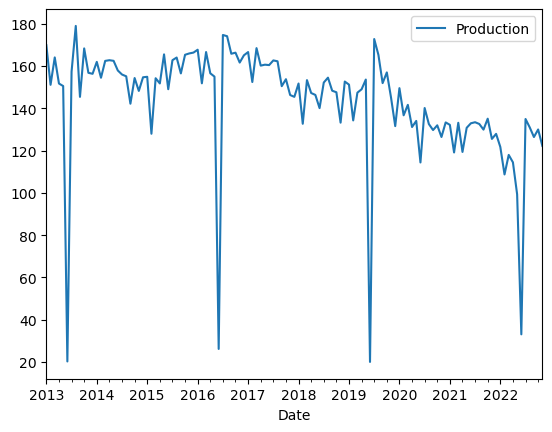

In [26]:

oil_dataset.plot()



In [27]:
# the mean and variance do not seem to be function of time 
# still checking the Stationarity using ADFuller Test

In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
adftest=adfuller(oil_dataset['Production'])

#H0(Null Hypothesis) : series is not stationary 

In [30]:
adftest[1]


0.007946196153876078

In [31]:

if(adftest[1]<0.05):
    print("p-Value <0.05 and hence Reject the H0 and therefore the series is Stationary")
else:
    print("p-Value is not less than 0.05 and hence Accept the H0 and therefore the series is Not Stationary")    

p-Value <0.05 and hence Reject the H0 and therefore the series is Stationary


In [32]:

# plotting the seasonality to check whether or not the series is Seasonal


In [33]:
import statsmodels.api as sm

<AxesSubplot:xlabel='Date'>

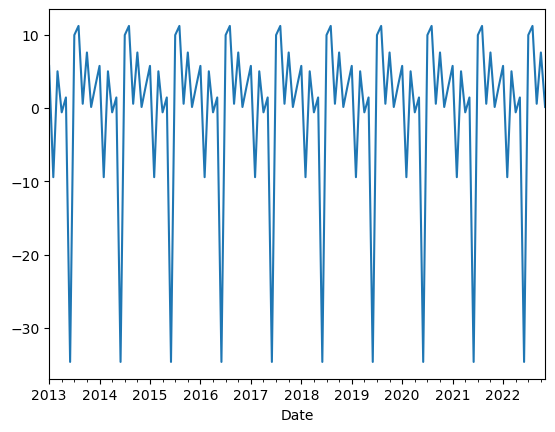

In [34]:
result=sm.tsa.seasonal_decompose(oil_dataset['Production'], model='additive',period=12)
result.seasonal.plot()

In [35]:
# as the graph shows the similar patterns hence we can conclude the series has Seasonality

In [36]:
# Thus we will apply SARIMAX to forecast the Production till December 2023

In [37]:
# we need to plot AutoCorrelation Function (ACF) and Partial AutoCorrelation Function (PACF) to know the approx value of p(lags) and q  

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


<Figure size 1000x500 with 0 Axes>

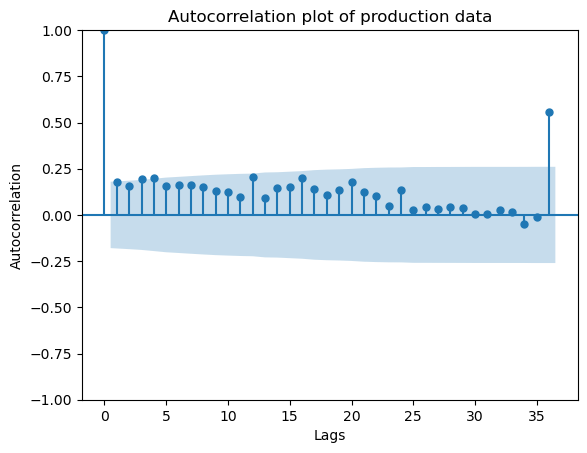

<Figure size 1000x500 with 0 Axes>

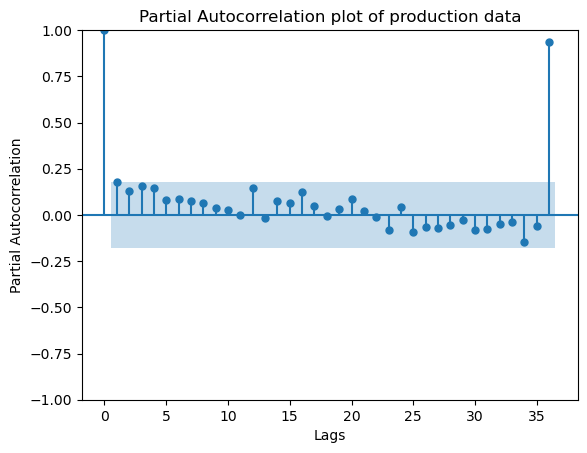

In [39]:
# Plotting the autocorrelation and partial autocorrelation plots
plt.figure(figsize=(10,5))
plot_acf(oil_dataset['Production'], lags=36)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation plot of production data')
plt.show()

plt.figure(figsize=(10,5))
plot_pacf(oil_dataset['Production'], lags=36)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation plot of production data')
plt.show()

In [40]:
# we get sudden shut in PACF plot around 1 so we can use it as p value (i.e. p=1) we did not get any Exponential drop in the ACF plot so we can't make any strong guess about q
# as we did not get any sure value of q we will apply auto Arima for the same

In [41]:
import pmdarima as pm 

In [42]:
check=pm.auto_arima(oil_dataset['Production'],m=12,seasonal=True,start_q=0,start_p=0,max_order=4,d=0,
                 error_action='ignore',suppress_warnings=True,stepwise=True,trace=True,stationary=False)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1127.903, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1121.589, Time=0.85 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1111.379, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1526.010, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1126.829, Time=0.21 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1121.890, Time=0.56 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.77 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1111.981, Time=0.24 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=1109.885, Time=0.83 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1126.644, Time=0.12 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=i

In [43]:
check.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  119
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood                -549.942
Date:                            Sat, 11 Feb 2023   AIC                           1109.885
Time:                                    02:19:30   BIC                           1123.780
Sample:                                01-01-2013   HQIC                          1115.527
                                     - 11-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     32.8959     39.976      0.823      0.411     -45.455     111.247
ar.L1          0.7659      0.280      2.733      0.006       0.217       1.315
ma.L1         -0.6197      0.335     -1.849      0.064      -1.277       0.037
ma.S.L12       0.8749      0.093      9.421      0.000       0.693       1.057
sigma2       522.1686     58.538      8.920      0.000     407.435     636.902
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               144.96
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -1.15
Prob(H) (two-sided):                  0.32   Kurtosis:                         7.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
# we got the best parameters p=1,d=0,q=1,P=0,D=0,Q=1,m=12


#Splitting the data into Train and Test


In [45]:
oil_dataset.shape


(119, 2)

In [46]:
# we have 119 rows so using 10% of the data as testing 
# so using approximately 10 rows as testing set

In [47]:
train=oil_dataset[:100]
test=oil_dataset[99:]



#applying SARIMAX



In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

In [49]:
model = SARIMAX(train['Production'], order=(1, 0, 1), seasonal_order=(0, 0, 1, 12))
results = model.fit()

In [50]:
pred = results.predict(start=100,end=len(oil_dataset)-1)

Text(0.5, 1.0, 'Prediction on testing set')

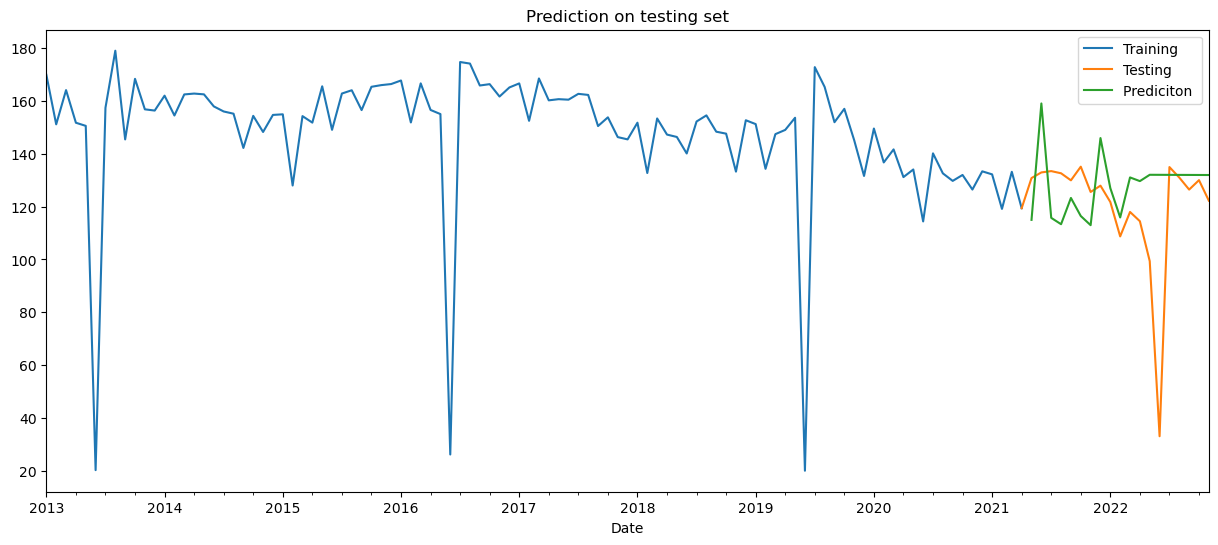

In [51]:
train['Production'].plot(legend=True,label='Training ',figsize=(15,6))
test['Production'].plot(legend=True,label='Testing ')
pred.plot(legend=True,label='Prediciton ')
plt.title('Prediction on testing set')

In [52]:


# as we can see the Auto ARIMA gave the parameters which minimizes the AIC but these parameters did not work well in Predicting the Values
# we have got the p=1 from PACF plot so now for q we are using some random value to make the prediction

Text(0.5, 1.0, 'Prediction on testing set')

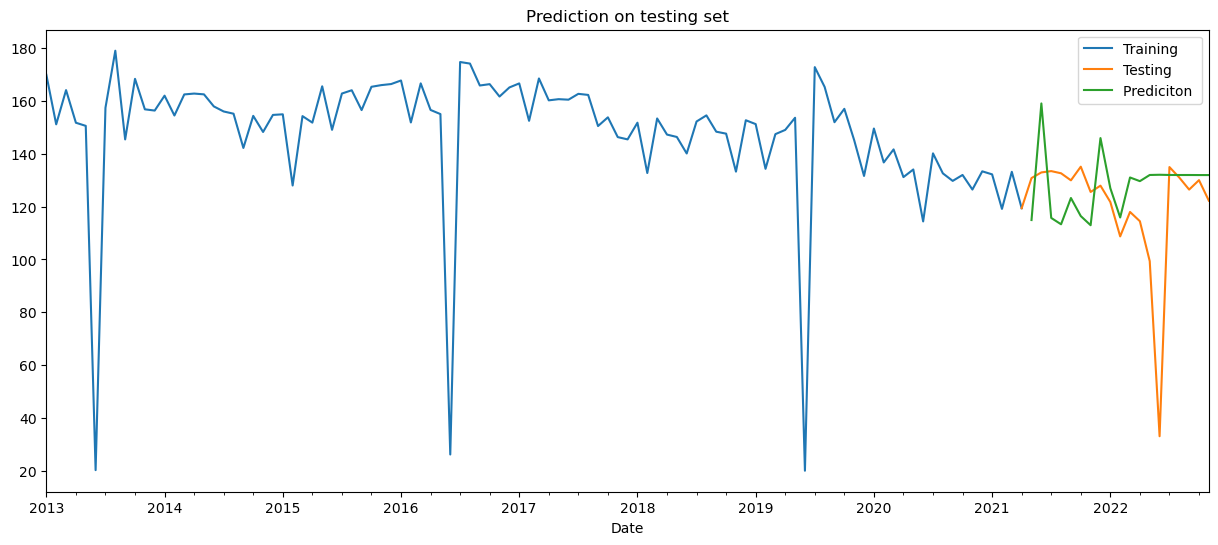

In [53]:
# using q=2 

model = SARIMAX(train['Production'], order=(1, 0, 2), seasonal_order=(1, 0, 2, 12))
results = model.fit()
pred = results.predict(start=100,end=len(oil_dataset)-1)
train['Production'].plot(legend=True,label='Training ',figsize=(15,6))
test['Production'].plot(legend=True,label='Testing ')
pred.plot(legend=True,label='Prediciton ')
plt.title('Prediction on testing set')

Text(0.5, 1.0, 'Prediction on testing set')

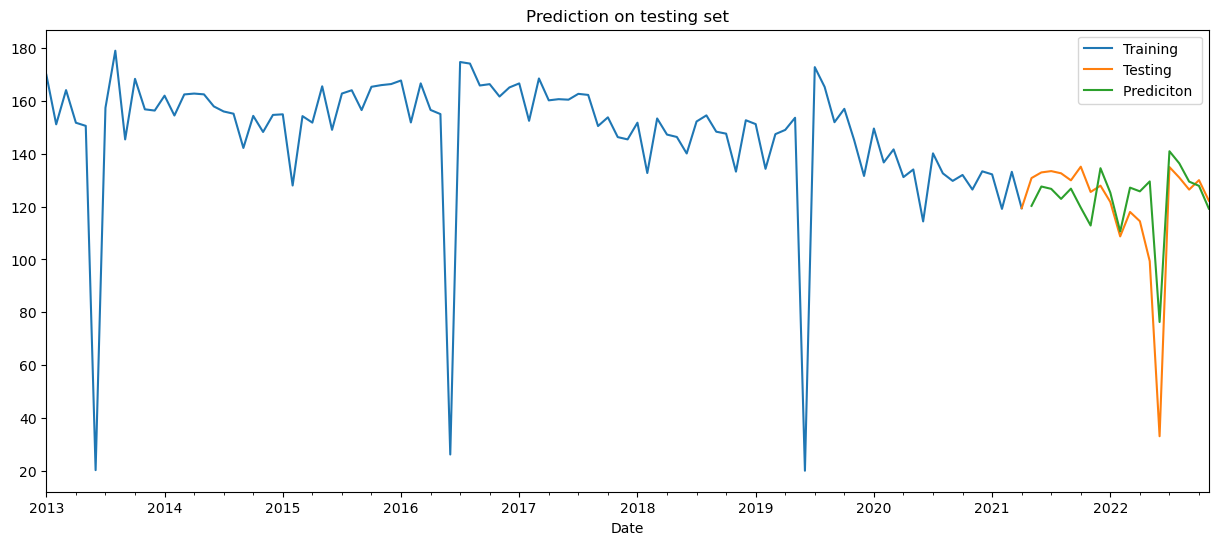

In [54]:
# using q=3

model = SARIMAX(train['Production'], order=(1, 0, 3), seasonal_order=(1, 0, 3, 12))
results = model.fit()
pred = results.predict(start=100,end=len(oil_dataset)-1)
train['Production'].plot(legend=True,label='Training ',figsize=(15,6))
test['Production'].plot(legend=True,label='Testing ')
pred.plot(legend=True,label='Prediciton ')
plt.title('Prediction on testing set')

In [55]:
# which makes far better prediction then q=1 and q=2 hence we fix our parameters p=1 and q=3 to make future prediction 


# forecasting future data


In [56]:
oil_dataset.tail()

,Project,Production
Date,,
2022-07-01,Greater Ekofisk Area,134.972917
2022-08-01,Greater Ekofisk Area,130.997637
2022-09-01,Greater Ekofisk Area,126.443677
2022-10-01,Greater Ekofisk Area,130.012203
2022-11-01,Greater Ekofisk Area,122.241957


In [57]:
# we have data for Year 2022 and we need to predict till December 2023 i.e. we need 12 more values

In [58]:
final_model = SARIMAX(oil_dataset['Production'], order=(1, 0, 3), seasonal_order=(1,0,3,12)).fit()


prediction=final_model.predict(len(oil_dataset),len(oil_dataset)+12) # as we need to forecast for next 13 months i.e. for December 2023

Text(0.5, 0, 'Date')

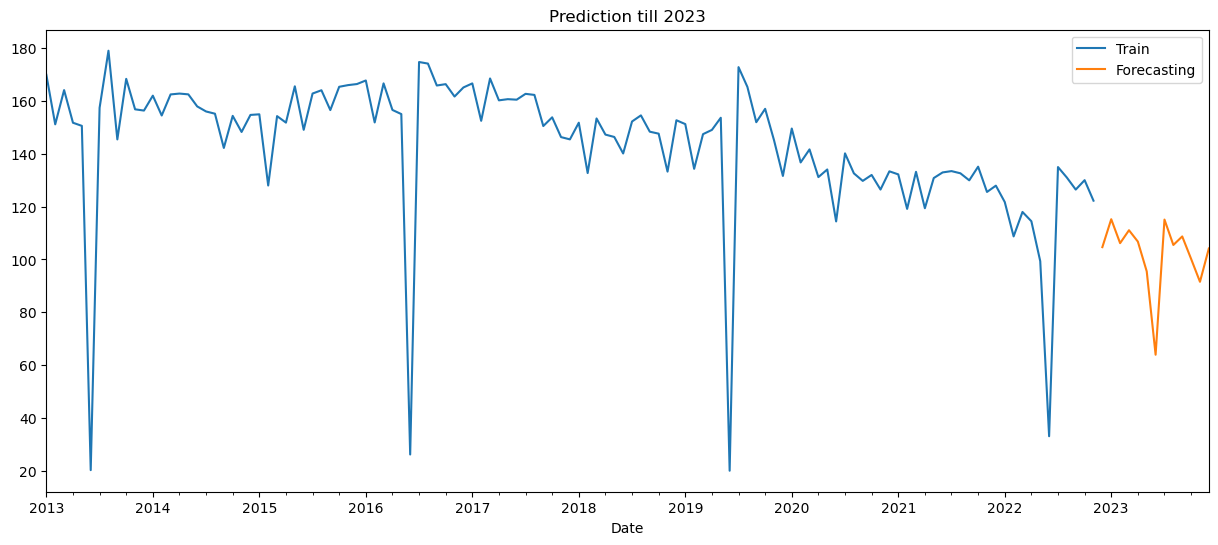

In [59]:
oil_dataset['Production'].plot(legend=True,label='Train',figsize=(15,6))
prediction.plot(legend=True,label='Forecasting')
plt.title('Prediction till 2023')
plt.xlabel('Date')

In [60]:
# lisiting the predicted values


In [61]:
forecasted_values=pd.DataFrame(prediction)
forecasted_values.reset_index(inplace=True)
forecasted_values.rename(columns={'index':'date'}, inplace=True)
forecasted_values.rename(columns={'predicted_mean':'Production'}, inplace=True)
forecasted_values.insert(0, 'project', "Greater Ecofisk Area")
forecasted_values.head(13)


,project,date,Production
0,Greater Ecofisk Area,2022-12-01,104.647595
1,Greater Ecofisk Area,2023-01-01,115.221520
2,Greater Ecofisk Area,2023-02-01,106.154949
3,Greater Ecofisk Area,2023-03-01,111.048529
4,Greater Ecofisk Area,2023-04-01,106.745543
5,Greater Ecofisk Area,2023-05-01,95.475089
6,Greater Ecofisk Area,2023-06-01,63.905351
7,Greater Ecofisk Area,2023-07-01,115.090864
8,Greater Ecofisk Area,2023-08-01,105.471354
9,Greater Ecofisk Area,2023-09-01,108.699420


In [62]:
forecasted_values.to_csv("forecasting_output.csv", index=False)
